## POWER HOUSE
scikit-learn

In [3]:
# pip install scikit-learn

## Classification
Classifying (examples)



1. Linear  `y = mx + c`
2. Non linear `quadratic` `x2 + 5x + c = number`

The person will default on a loan or not ( age, gender, account balance)

####  Linear Models
1. Lasso
2. Elastic-Net
3. Logistic regression

### Stochastic Gradient Descent
4. Stochastic Gradient Descent - SGD

5. Support Vector Machines 
### Nearest Neighbors
6. Nearest Neighbors (KNN)
7. Naive Bayes
## Trees
8. Decision Trees ( decision and random forest)

## Ensemble 

## Neural network models (supervised)

##  Multiclass and multioutput algorithms

example : Classify the cutomer will be subscribe savings, current,dom, investment,


### Feature selection ( prepping data)

### Performance metrics

Supervised : You know your data label ( trying to predict loan, predict houses)

Linear and non linear models
1. Classification 
2. Regression
3. Multilabel classification

Unsupervised : Create a label ( clustering)

Nine clusters ( mean salary, avg spend, dom balance) ( high spenders, low spenders, high class)

### Classification
K-Nearest Neighbors : The KNN algorithm assumes that similar things exist in close proximity (neighbours)
Support Vector Machines
Decision Tree Classifiers/Random Forests
Naive Bayes
Linear Discriminant Analysis
Logistic Regression

In [ ]:
# CREATE A FAKE DATASET 
#Banking 

## PREPROCESSING OUR DATA

In [15]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EXPLORATORY DATA ANALYSIS

In [7]:
df.shape

(614, 13)

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
1. Categorical variable ( transform to numbers [0,1,2] , [0,1,2], [0,1])
2. Numerical variables ( clean it, removes outliers, normalization (logarithm))

## CLEAN VALUES

In [25]:
print(df['Property_Area'].unique())
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Loan_Status'].unique())
print(df['Dependents'].unique())

['Urban' 'Rural' 'Semiurban']
['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Y' 'N']
['0' '1' '2' '3+' nan]


In [26]:
df.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
cleanup_nums = {"Property_Area":     {'Urban':0, 'Rural':1, 'Semiurban':2},
                "Gender": {'Male':0, 'Female':1, np.nan :2},
                "Married": {'No':0, 'Yes':1, np.nan :2},
                "Education": {'Graduate':0, 'Not Graduate':1},
                  "Self_Employed": {'No':0, 'Yes':1, np.nan :2},
                "Loan_Status": {'Y':0, 'N':1},
                "Dependents": {'0':0, '1' :1,'2':2, '3+':3, np.nan:4},
                
               }

In [58]:
train = df.copy()

In [59]:
train= train.replace(cleanup_nums)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,NaN,360.0,1.0,0,0
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0


In [60]:
df.select_dtypes(include=[np.number]).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


## CLEAN NUMERICAL VALUES

In [37]:
df.select_dtypes(include=[np.number]).head().columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [61]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for col in cols :
    train[col] = train[col].fillna(train[col].mean())

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for col in cols :
    train[col] = np.log1p(train[col])

In [63]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,8.674197,0.000000,4.993232,5.888878,0.693147,0,0
1,LP001003,0,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,1,1
2,LP001005,0,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.693147,0,0
3,LP001006,0,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.693147,0,0
4,LP001008,0,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.693147,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,7.972811,0.000000,4.276666,5.888878,0.693147,1,0
610,LP002979,0,1,3,0,0,8.320448,0.000000,3.713572,5.198497,0.693147,1,0
611,LP002983,0,1,1,0,0,8.996280,5.484797,5.537334,5.888878,0.693147,0,0
612,LP002984,0,1,2,0,0,8.933796,0.000000,5.236442,5.888878,0.693147,0,0


In [64]:
# df

In [65]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for col in cols :
    print(train[col].max())


11.302216779257382
10.637488727104339
6.55250788703459
6.175867270105761
0.6931471805599453


In [66]:
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,8.341510,4.290129,4.870872,5.805381,0.585982
std,0.645035,3.875873,0.491376,0.309569,0.242495
min,5.017280,0.000000,2.302585,2.564949,0.000000
25%,7.965024,0.000000,4.617584,5.888878,0.693147
50%,8.246303,7.081125,4.867534,5.888878,0.693147
75%,8.664922,7.739897,5.110477,5.888878,0.693147
max,11.302217,10.637489,6.552508,6.175867,0.693147


In [67]:
# train.describe()

In [49]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,8.674026,-inf,4.986426,5.886104,0.0,0,0
1,LP001003,0,1,1,0,0,8.430109,7.318540,4.852030,5.886104,0.0,1,1
2,LP001005,0,1,0,0,1,8.006368,-inf,4.189655,5.886104,0.0,0,0
3,LP001006,0,1,0,1,0,7.856707,7.765569,4.787492,5.886104,0.0,0,0
4,LP001008,0,0,0,0,0,8.699515,-inf,4.948760,5.886104,0.0,0,0


In [52]:
Independent_variables = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
dependent_variable = 'Loan_Status'

## FEATURE SELECTIONS

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
len(df.columns)

13

In [69]:
X = train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]  #independent columns
y = train['Loan_Status']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs      Score
9      Credit_History  18.022063
6   CoapplicantIncome   7.880856
10      Property_Area   4.398854
3           Education   3.540502
1             Married   2.047144
0              Gender   0.498961
4       Self_Employed   0.087261
7          LoanAmount   0.053938
2          Dependents   0.048953
5     ApplicantIncome   0.003672


In [ ]:
['Credit_History','CoapplicantIncome','Property_Area','Education','Married','Gender']

## feed on all models

## hyperparameter tuning

After feeding data on model, pick one that performs the most ( metrics )

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [92]:
names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(penalty='l2'),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [97]:
from sklearn.model_selection import train_test_split
X = train[['Credit_History','CoapplicantIncome','Property_Area','Education','Married','Gender']]  #independent columns
y = train['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [98]:
X_train.head(3)

,Credit_History,CoapplicantIncome,Property_Area,Education,Married,Gender
244,0.693147,8.393442,2,1,1,0
393,0.693147,7.393878,2,1,1,0
310,0.693147,0.000000,2,0,0,1


In [99]:
X_test.head(1)

,Credit_History,CoapplicantIncome,Property_Area,Education,Married,Gender
350,0.693147,0.0,2,0,1,0


In [100]:
accuracyScores =[]
precisionScores=[]
recallScoreS=[]
roc_aucScoreS=[]


for  name, classifier in zip(names, classifiers):
    model = classifier.fit(X_train, y_train)
    ypred = model.predict(X_test)
    accuracyScore = accuracy_score(y_test,ypred)
    precisionScore = precision_score(y_test,ypred)
    recallScore = recall_score(y_test,ypred)
    roc_aucScore = roc_auc_score(y_test,ypred)
     
    accuracyScores.append(accuracyScore)
    precisionScores.append(precisionScore)
    recallScoreS.append(recallScore)
    roc_aucScoreS.append(roc_aucScore)
    
    
    
    
    


/Users/apple/Desktop/indicina/coding/model-building-project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
result = pd.DataFrame(
{
    "MODEL_NAME" : names ,
    " accuracyScores": accuracyScores,
    "precisionScores":precisionScores,
    "recallScoreS":recallScoreS,
    "roc_aucScoreS":roc_aucScoreS
})

In [102]:
result

,MODEL_NAME,accuracyScores,precisionScores,recallScoreS,roc_aucScoreS
0,Logistic Regression,0.798030,0.942857,0.458333,0.721533
1,Nearest Neighbors,0.709360,0.658537,0.375000,0.634065
2,Linear SVM,0.645320,0.000000,0.000000,0.500000
3,RBF SVM,0.753695,0.892857,0.347222,0.662161
4,Gaussian Process,0.798030,0.942857,0.458333,0.721533
5,Decision Tree,0.783251,0.868421,0.458333,0.710083
6,Random Forest,0.798030,0.942857,0.458333,0.721533
7,Neural Net,0.660099,1.000000,0.041667,0.520833
8,AdaBoost,0.798030,0.942857,0.458333,0.721533
9,Naive Bayes,0.798030,0.942857,0.458333,0.721533


In [104]:
result.sort_values(by =['roc_aucScoreS'], ascending=False)

,MODEL_NAME,accuracyScores,precisionScores,recallScoreS,roc_aucScoreS
0,Logistic Regression,0.798030,0.942857,0.458333,0.721533
4,Gaussian Process,0.798030,0.942857,0.458333,0.721533
6,Random Forest,0.798030,0.942857,0.458333,0.721533
8,AdaBoost,0.798030,0.942857,0.458333,0.721533
9,Naive Bayes,0.798030,0.942857,0.458333,0.721533
10,QDA,0.798030,0.942857,0.458333,0.721533
5,Decision Tree,0.783251,0.868421,0.458333,0.710083
3,RBF SVM,0.753695,0.892857,0.347222,0.662161
1,Nearest Neighbors,0.709360,0.658537,0.375000,0.634065
7,Neural Net,0.660099,1.000000,0.041667,0.520833


## Regression

In [105]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,8.674197,0.000000,4.993232,5.888878,0.693147,0,0
1,LP001003,0,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,1,1
2,LP001005,0,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.693147,0,0
3,LP001006,0,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.693147,0,0
4,LP001008,0,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.693147,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,0,7.972811,0.000000,4.276666,5.888878,0.693147,1,0
610,LP002979,0,1,3,0,0,8.320448,0.000000,3.713572,5.198497,0.693147,1,0
611,LP002983,0,1,1,0,0,8.996280,5.484797,5.537334,5.888878,0.693147,0,0
612,LP002984,0,1,2,0,0,8.933796,0.000000,5.236442,5.888878,0.693147,0,0


In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome','Loan_Status',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]  #independent columns
y = train['LoanAmount']

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.608473
Feature 1: 16.850798
Feature 2: 13.108138
Feature 3: 9.241182
Feature 4: 5.337882
Feature 5: 131.958189
Feature 6: 6.559900
Feature 7: 0.042967
Feature 8: 4.260102
Feature 9: 1.597181
Feature 10: 1.767700


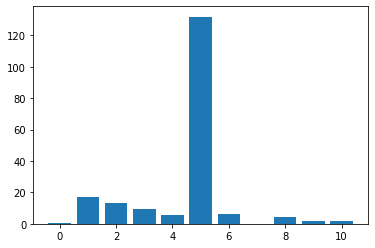

In [109]:
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [111]:
# X_train_fs, X_test_fs, fs